<a href="https://colab.research.google.com/github/avazxondev/Python_GUI_Projects_eng/blob/main/Loyiha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 20.33 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [4]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 21371 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

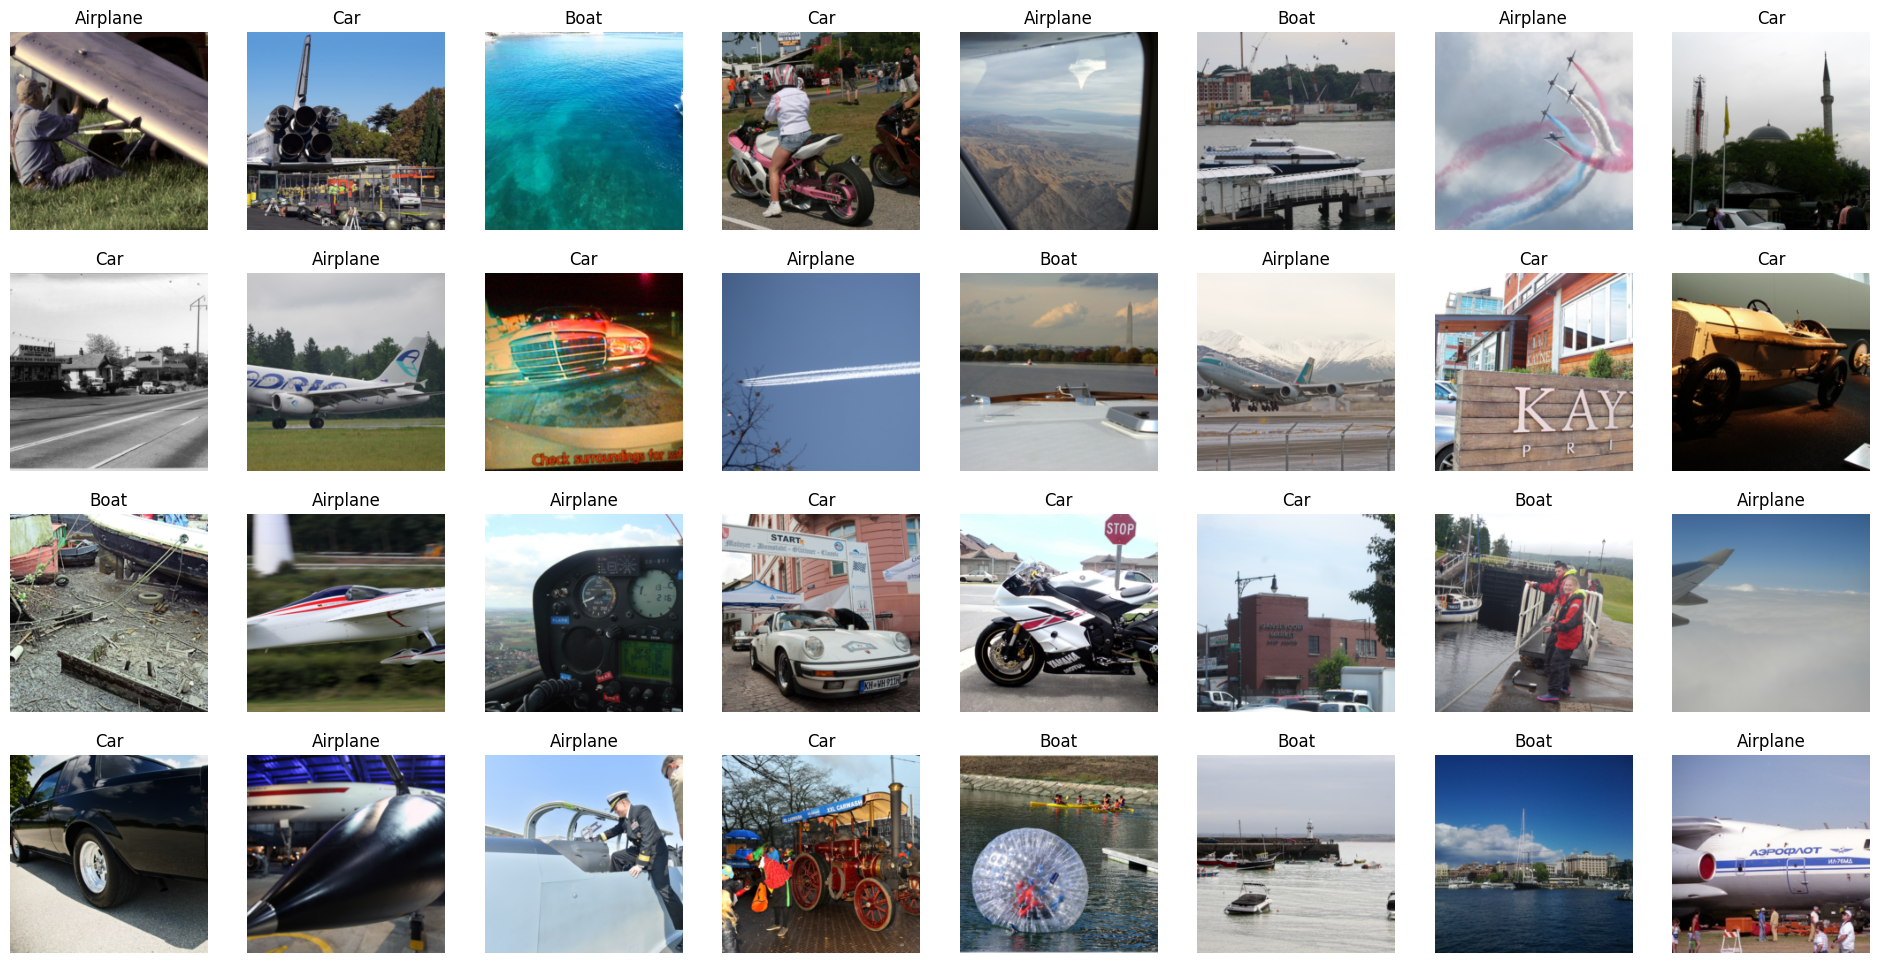

In [5]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')

#DataBlock
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoader
dls = transports.dataloaders(path)

#ChakingDataSet
dls.train.show_batch(max_n=32, nrows=4)

In [6]:
#train
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 119MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.267208,0.274173,0.108333,03:24


epoch,train_loss,valid_loss,error_rate,time
0,0.470561,0.199317,0.066667,04:50
1,0.305748,0.160635,0.058333,04:47
2,0.224195,0.155175,0.058333,04:47
3,0.183973,0.159161,0.050000,04:48


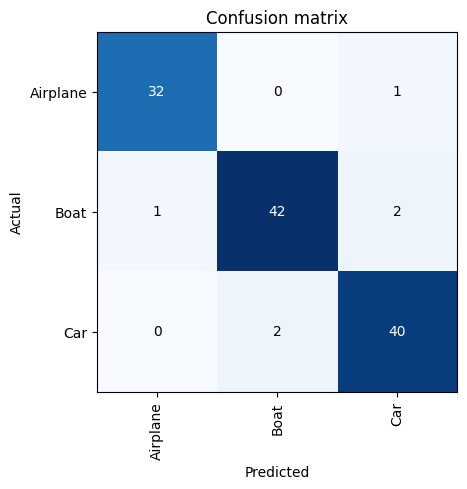

In [7]:
#cheking
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

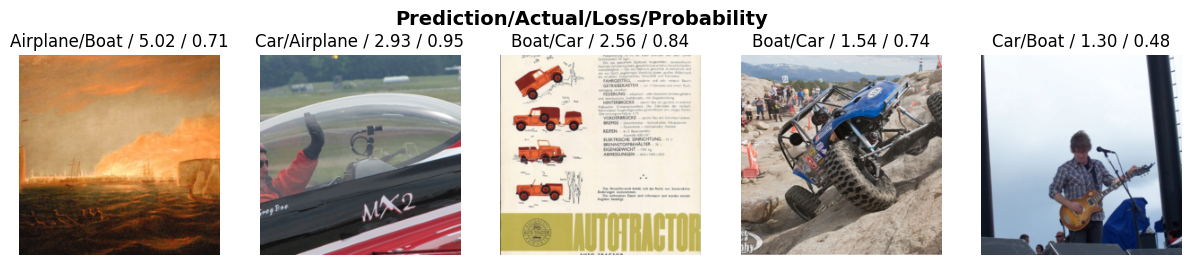

In [8]:
interp.plot_top_losses(5, nrows=1)

In [9]:
#chekingmodel
upload =  widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [14]:
image = PILImage.create(upload.data[-1])
image
pred, pred_idx, probs = learn.predict(image)
print(f'Prediction: {pred}; Probability: {probs[pred_idx]*100:.01f}%')

Prediction: Car; Probability: 100.0%


In [15]:
#SAVE OUR MODEL
learn.export('transport_model.pkl')

In [16]:
model = load_learner("/content/transport_model.pkl")

In [17]:
model.predict(image)

('Car', tensor(2), tensor([4.6036e-05, 9.8620e-05, 9.9986e-01]))